In [2]:
df_raw = pd.read_csv('../train.csv')
df_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [44]:
# dtype 사용
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [19]:
# string인 column만 선별하기
def isstr(col):
    if col.dtypes == 'O' :
        return True
    
strcol_name=[]
i=0
col_names = df_raw.columns
for col in col_names:
    if isstr(df_raw[col]) != True :
        strcol_name.append(i)
    i+=1
    
# SalePrice가 있는 col 포함 = 80번째
# strcol_name.append(80)

In [20]:
len(strcol_name)

38

In [21]:
df_int = df_raw.iloc[:, strcolum_name]
df_int.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,830,290,136,...,736,68,0,0,0,0,0,6,2008,147500


In [22]:
df_new = df_int

col_names = df_new.columns[0:-1]
ls=[]

def change_var(x):
    if type(x) is int :
        x = np.log(x)
        return x
    else:
        return x
    
for col_name in col_names:
#     df1 = pd.DataFrame(df_new, columns=[col_name,"SalePrice"])  
#     df2 = df1.groupby([col_name])["SalePrice"].median().reset_index(name='Median').sort_values('Median').reset_index(drop=True)
#     def isgrade(data) :
#         for idx in range(len(df2)):
#             if data == df2[col_name][idx]:
#                 return idx+1
    
    df_new[col_name + '_new'] = df_new[col_name].apply(change_var)
    
df_new = df_new.iloc[:,43:]

df_new["SalePrice"] = df_int["SalePrice"]
df_new.tail()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BsmtFinSF2_new,BsmtUnfSF_new,TotalBsmtSF_new,1stFlrSF_new,2ndFlrSF_new,LowQualFinSF_new,GrLivArea_new,BsmtFullBath_new,BsmtHalfBath_new,FullBath_new,...,WoodDeckSF_new,OpenPorchSF_new,EnclosedPorch_new,3SsnPorch_new,ScreenPorch_new,PoolArea_new,MiscVal_new,MoSold_new,YrSold_new,SalePrice
1455,-inf,6.859615,6.859615,6.859615,6.542472,-inf,7.406711,-inf,-inf,0.693147,...,-inf,3.688879,-inf,-inf,-inf,-inf,-inf,2.079442,7.604396,175000
1456,5.093750,6.378426,7.340836,7.636752,-inf,-inf,7.636752,0.000000,-inf,0.693147,...,5.855072,-inf,-inf,-inf,-inf,-inf,-inf,0.693147,7.605890,210000
1457,-inf,6.776507,7.049255,7.080026,7.049255,-inf,7.757906,-inf,-inf,0.693147,...,-inf,4.094345,-inf,-inf,-inf,-inf,7.824046,1.609438,7.605890,266500
1458,6.936343,-inf,6.982863,6.982863,-inf,-inf,6.982863,0.000000,-inf,0.000000,...,5.902633,-inf,4.718499,-inf,-inf,-inf,-inf,1.386294,7.605890,142125
1459,5.669881,4.912655,7.135687,7.135687,-inf,-inf,7.135687,0.000000,-inf,0.000000,...,6.601230,4.219508,-inf,-inf,-inf,-inf,-inf,1.791759,7.604894,147500


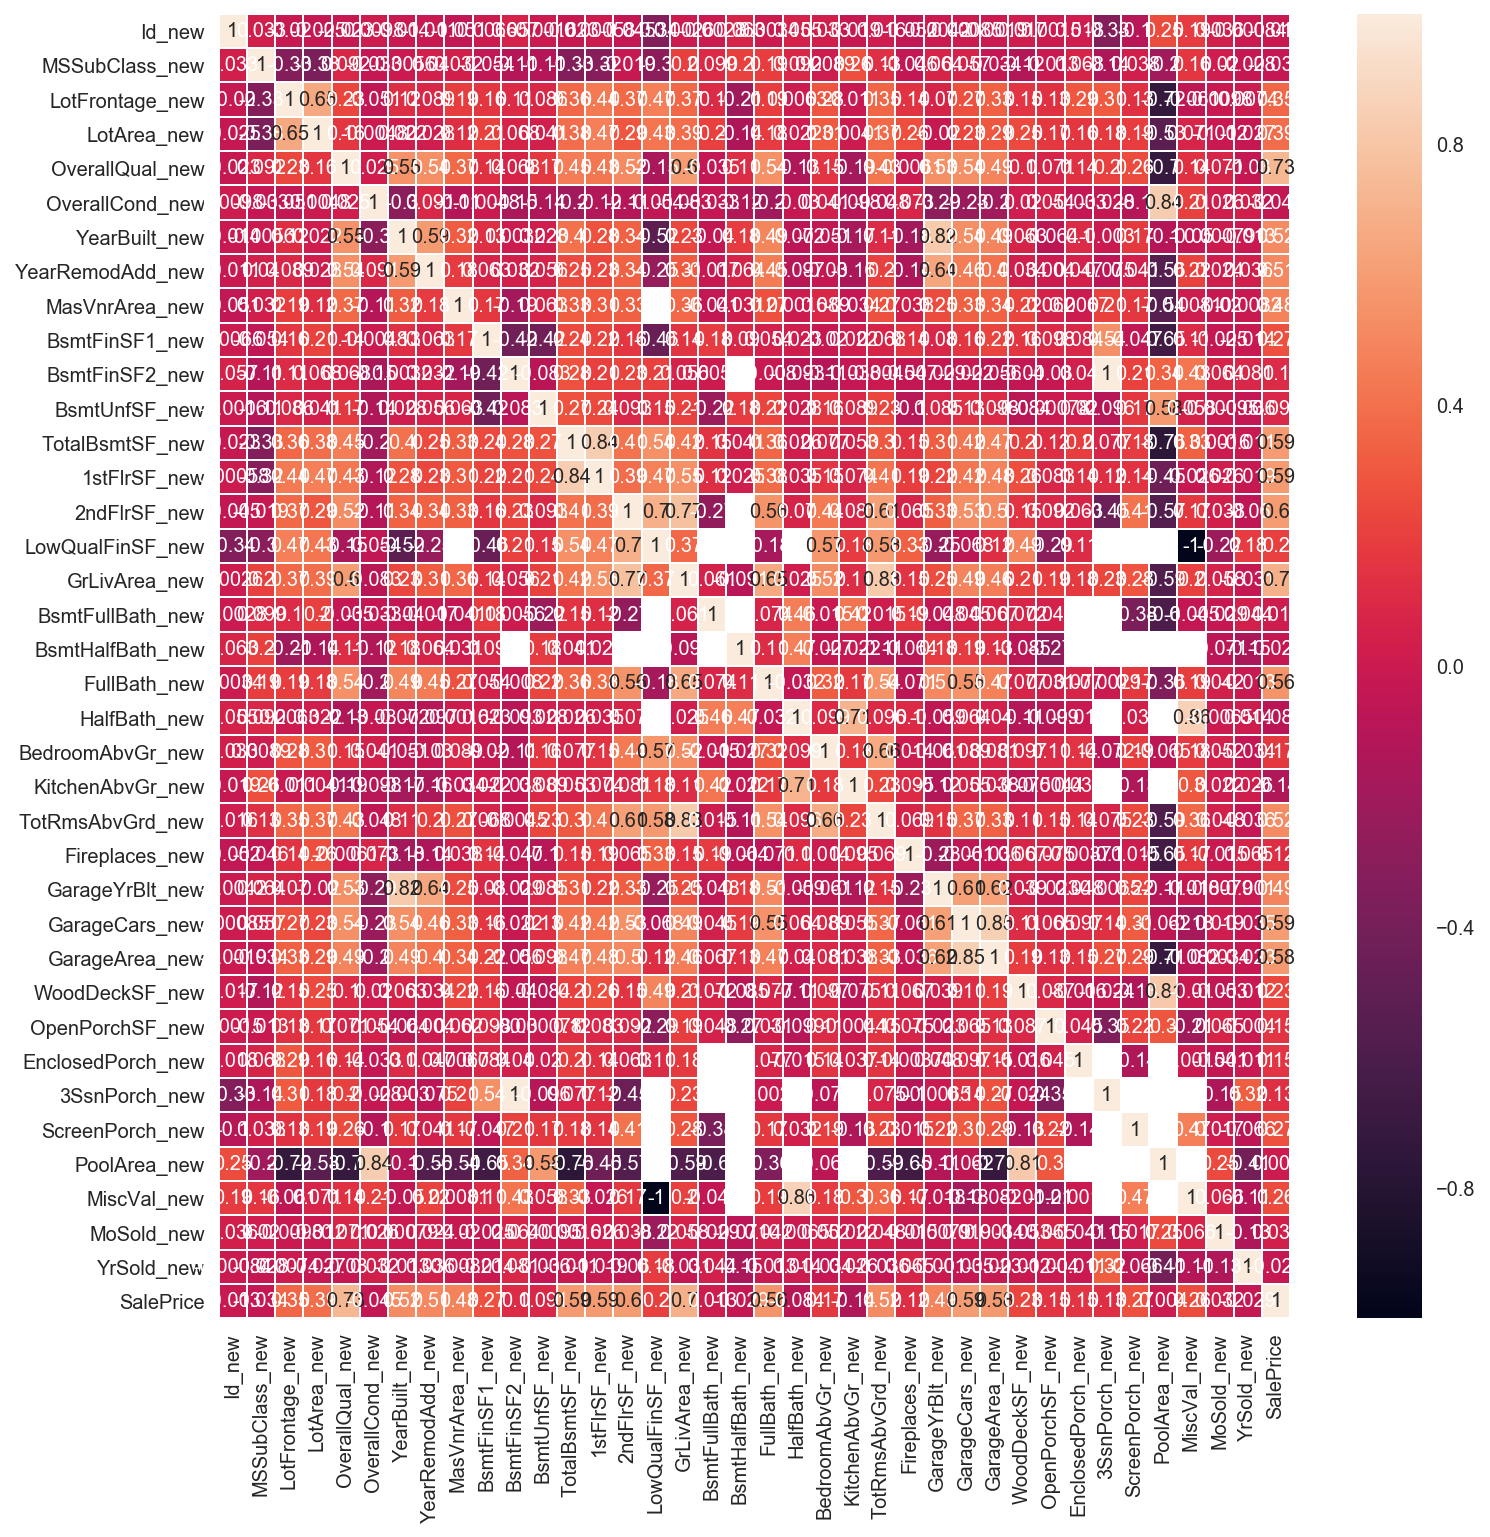

In [40]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
heat= df_new.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)

In [41]:
# 로그
heat["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
OverallQual_new      0.732961
GrLivArea_new        0.695118
2ndFlrSF_new         0.598225
GarageCars_new       0.594728
1stFlrSF_new         0.591264
TotalBsmtSF_new      0.588625
GarageArea_new       0.584384
FullBath_new         0.560438
YearBuilt_new        0.520574
TotRmsAbvGrd_new     0.518781
YearRemodAdd_new     0.506848
GarageYrBlt_new      0.486362
MasVnrArea_new       0.477493
LotArea_new          0.388520
LotFrontage_new      0.351799
ScreenPorch_new      0.272604
BsmtFinSF1_new       0.270594
MiscVal_new          0.255574
WoodDeckSF_new       0.232849
LowQualFinSF_new     0.201146
BedroomAbvGr_new     0.168871
EnclosedPorch_new    0.154907
OpenPorchSF_new      0.152648
3SsnPorch_new        0.128369
Fireplaces_new       0.122466
BsmtFinSF2_new       0.103962
BsmtUnfSF_new        0.091363
MoSold_new           0.032255
BsmtFullBath_new     0.013015
PoolArea_new         0.004035
Id_new              -0.013088
BsmtHalfBath_new    -0.028835
YrSold_new

In [35]:
# 루트
heat["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
OverallQual_new      0.767893
GrLivArea_new        0.708765
1stFlrSF_new         0.604609
TotalBsmtSF_new      0.554747
GarageCars_new       0.547138
GarageArea_new       0.546663
TotRmsAbvGrd_new     0.528980
FullBath_new         0.522177
YearBuilt_new        0.521742
YearRemodAdd_new     0.506975
GarageYrBlt_new      0.486362
Fireplaces_new       0.481755
MasVnrArea_new       0.477493
OpenPorchSF_new      0.406955
LotArea_new          0.366675
LotFrontage_new      0.351799
WoodDeckSF_new       0.336822
HalfBath_new         0.293911
BsmtFinSF1_new       0.293820
2ndFlrSF_new         0.235201
BsmtFullBath_new     0.230692
BsmtUnfSF_new        0.201428
BedroomAbvGr_new     0.148578
ScreenPorch_new      0.102438
PoolArea_new         0.093411
3SsnPorch_new        0.047392
MoSold_new           0.040831
BsmtHalfBath_new    -0.016380
Id_new              -0.018334
YrSold_new          -0.028922
BsmtFinSF2_new      -0.034474
LowQualFinSF_new    -0.036704
MiscVal_ne

In [29]:
# 제곱
heat["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
OverallQual_new      0.817168
GarageCars_new       0.671394
GrLivArea_new        0.652267
GarageArea_new       0.606301
FullBath_new         0.577302
1stFlrSF_new         0.548990
TotRmsAbvGrd_new     0.527843
YearBuilt_new        0.525170
YearRemodAdd_new     0.507348
GarageYrBlt_new      0.486362
TotalBsmtSF_new      0.479082
MasVnrArea_new       0.477493
2ndFlrSF_new         0.432726
Fireplaces_new       0.375700
LotFrontage_new      0.351799
BsmtFinSF1_new       0.284082
BsmtUnfSF_new        0.249341
WoodDeckSF_new       0.240033
HalfBath_new         0.238766
BsmtFullBath_new     0.194449
BedroomAbvGr_new     0.162842
OpenPorchSF_new      0.151408
LotArea_new          0.114468
ScreenPorch_new      0.112686
PoolArea_new         0.088294
MoSold_new           0.050152
3SsnPorch_new        0.031870
BsmtFinSF2_new       0.025130
LowQualFinSF_new    -0.009395
MiscVal_new         -0.010020
BsmtHalfBath_new    -0.017433
Id_new              -0.023345
YrSold_new